In [ ]:
import sys, os
sys.path.append(os.path.abspath('..'))  # 相对于当前 Notebook 的目录
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os
from sdf_utils import *

# === 文件路径设置 ===
base_dir0 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米'
base_dir1 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-1微米'
file_name = 'field0008.sdf'
file_path0 = os.path.join(base_dir0, file_name)
file_path1 = os.path.join(base_dir0, file_name)



result0 = load_field(file_path0)
result1 = load_field(file_path1)

# 假设你已经加载了字段数据为 result
Ex = result['Ex']
Ey = result['Ey']
Ez = result['Ez']
x = result['x']
y = result['y']
z = result['z']

# 计算光强
Intensity = Ex**2 + Ey**2 + Ez**2  # shape: (Nx, Ny, Nz)

# 找到最接近 x = 18μm 的索引
target_x = 18e-6
x_index = np.argmin(np.abs(x - target_x))

# 提取 y-z 面的光强
I_yz = Intensity[x_index, :, :]  # shape: (Ny, Nz)

# 构造 y-z 网格
Y, Z = np.meshgrid(y, z, indexing='ij')  # shape: (Ny, Nz)

# 找到最接近 z=0 的索引
z_index = np.argmin(np.abs(z - 0.0))

# 提取 z=0 截面的强度（y方向剖面）
I_y_z0 = I_yz[:, z_index]  # shape: (Ny,)

# 绘图
fig, axs = plt.subplots(2, 1, figsize=(8,10), gridspec_kw={'height_ratios': [3,1]})

# 2D 光强分布图
pcm = axs[0].pcolormesh(Y, Z, I_yz, shading='auto', cmap='hot')
fig.colorbar(pcm, ax=axs[0], label='Intensity (arb. units)')
axs[0].set_xlabel('y (m)')
axs[0].set_ylabel('z (m)')
axs[0].set_title(f'2D Intensity Map at x = {x[x_index]:.2e} m')

# z=0 处的 y 向剖面折线图
axs[1].plot(y, I_y_z0, color='blue')
axs[1].set_xlabel('y (m)')
axs[1].set_ylabel('Intensity (z=0)')
axs[1].set_title('Intensity profile at z = 0')

plt.tight_layout()
plt.show()

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米/field0009.sdf
t() = time
bx(2500, 350, 350) = bx
by(2500, 350, 350) = by
bz(2500, 350, 350) = bz
ex(2500, 350, 350) = ex
ey(2500, 350, 350) = ey
ez(2500, 350, 350) = ez
x(2501, 351, 351) = grid
y(2501, 351, 351) = grid
z(2501, 351, 351) = grid
xc(2500, 350, 350) = grid_mid
yc(2500, 350, 350) = grid_mid
zc(2500, 350, 350) = grid_mid
Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-3微米/field0009.sdf
t() = time
bx(2500, 350, 350) = bx
by(2500, 350, 350) = by
bz(2500, 350, 350) = bz
ex(2500, 350, 350) = ex
ey(2500, 350, 350) = ey
ez(2500, 350, 350) = ez
x(2501, 351, 351) = grid
y(2501, 351, 351) = grid
z(2501, 351, 351) = grid
xc(2500, 350, 350) = grid_mid
yc(2500, 350, 350) = grid_mid
zc(2500, 350, 350) = grid_mid


/tmp/ipykernel_1851662/3868750000.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


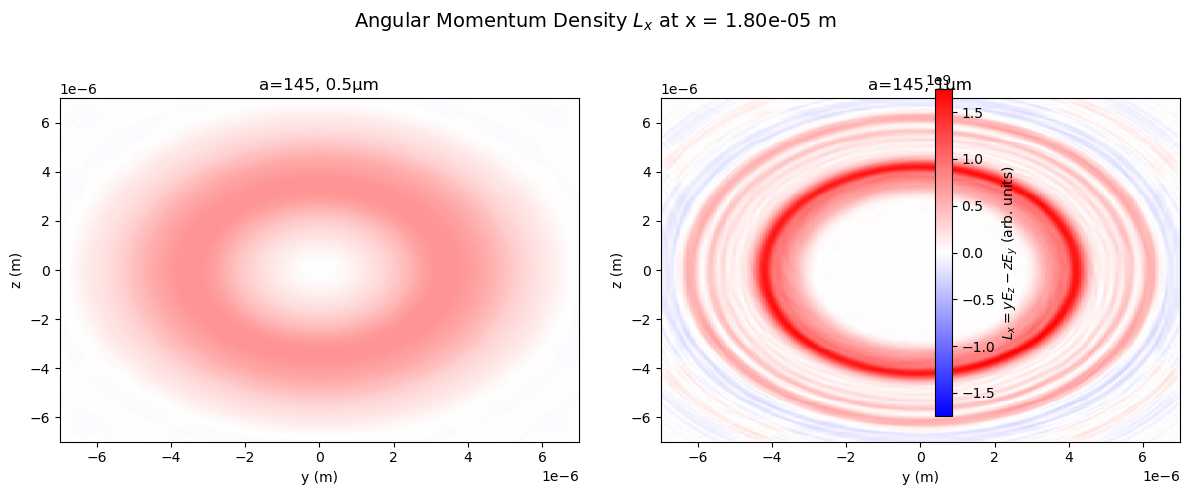

In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import load_field  # 确保你有这个函数

# === 文件路径设置 ===
base_dir0 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米'
base_dir1 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-3微米'
file_name = 'field0009.sdf'
file_path0 = os.path.join(base_dir0, file_name)
file_path1 = os.path.join(base_dir1, file_name)

# === 加载字段数据 ===
result0 = load_field(file_path0)
result1 = load_field(file_path1)

# === 提取字段 ===
def compute_Lx(result, x0=18e-6):
    Ex, Ey, Ez = result['Ex'], result['Ey'], result['Ez']
    x, y, z = result['x'], result['y'], result['z']
    
    x_index = np.argmin(np.abs(x - x0))
    Ey_cut = Ey[x_index, :, :]  # (Ny, Nz)
    Ez_cut = Ez[x_index, :, :]  # (Ny, Nz)
    
    Y, Z = np.meshgrid(y, z, indexing='ij')  # match shape
    
    Lx = Y * Ez_cut - Z * Ey_cut
    return Lx, Y, Z, x[x_index]

# === 分别计算 Lx ===
Lx0, Y0, Z0, xpos0 = compute_Lx(result0)
Lx1, Y1, Z1, xpos1 = compute_Lx(result1)

# === 绘图比较 ===
vmax = max(np.abs(Lx0).max(), np.abs(Lx1).max())  # 保持色标一致

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

im0 = axs[0].pcolormesh(Y0, Z0, Lx0, shading='auto', cmap='bwr', vmin=-vmax, vmax=vmax)
axs[0].set_title('a=145, 0.5μm')
axs[0].set_xlabel('y (m)')
axs[0].set_ylabel('z (m)')

im1 = axs[1].pcolormesh(Y1, Z1, Lx1, shading='auto', cmap='bwr', vmin=-vmax, vmax=vmax)
axs[1].set_title('a=145, 1μm')
axs[1].set_xlabel('y (m)')
axs[1].set_ylabel('z (m)')

# colorbar 共用
cbar = fig.colorbar(im1, ax=axs.ravel().tolist(), shrink=0.85)
cbar.set_label('$L_x = y E_z - z E_y$ (arb. units)')

plt.suptitle(f'Angular Momentum Density $L_x$ at x = {xpos0:.2e} m', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


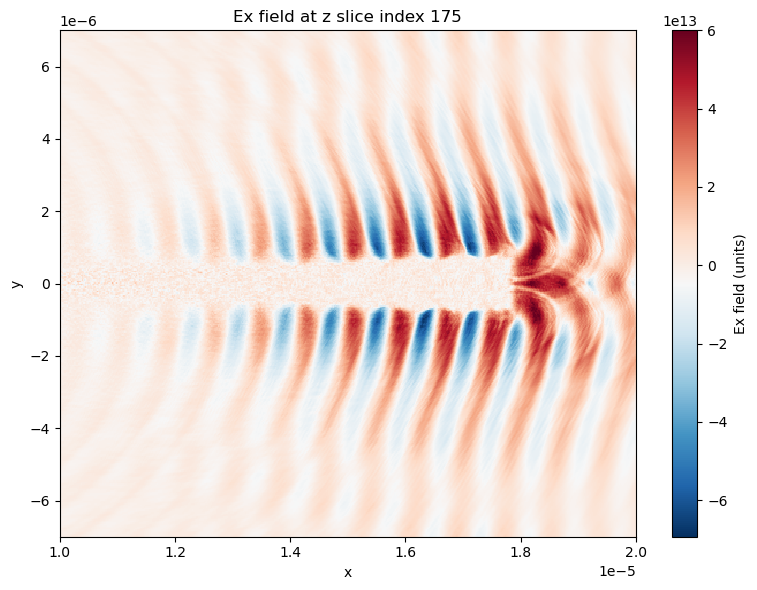

In [43]:
Ex = result['Ex']  # 3D数组，形状可能是 (Nx, Ny, Nz)
x = result['x']    # 1D 或 3D 坐标数组，视具体情况而定
y = result['y']
z = result['z']

# 找到固定z的索引，比如取中间那个z层
z_index = Ex.shape[2] // 2  # 中间切片

# 取出该z层的二维数据 Ex_xy
Ex_xy = Ex[:, :, z_index]

# 如果 x,y 是1D数组，需要生成网格
if x.ndim == 1 and y.ndim == 1:
    X, Y = np.meshgrid(x, y, indexing='ij')
else:
    # 如果x,y是3D数组，取对应切片
    X = x[:, :, z_index]
    Y = y[:, :, z_index]

plt.figure(figsize=(8,6))
pcm = plt.pcolormesh(X, Y, Ex_xy, shading='auto', cmap='RdBu_r',vmax=6e13)
plt.colorbar(pcm, label='Ex field (units)')
plt.xlabel('x')
plt.xlim(1e-5,2e-5)
plt.ylabel('y')
plt.title(f'Ex field at z slice index {z_index}')
plt.tight_layout()
plt.show()

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米/field0008.sdf
t() = time
bx(2500, 350, 350) = bx
by(2500, 350, 350) = by
bz(2500, 350, 350) = bz
ex(2500, 350, 350) = ex
ey(2500, 350, 350) = ey
ez(2500, 350, 350) = ez
x(2501, 351, 351) = grid
y(2501, 351, 351) = grid
z(2501, 351, 351) = grid
xc(2500, 350, 350) = grid_mid
yc(2500, 350, 350) = grid_mid
zc(2500, 350, 350) = grid_mid
Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-3微米/field0008.sdf
t() = time
bx(2500, 350, 350) = bx
by(2500, 350, 350) = by
bz(2500, 350, 350) = bz
ex(2500, 350, 350) = ex
ey(2500, 350, 350) = ey
ez(2500, 350, 350) = ez
x(2501, 351, 351) = grid
y(2501, 351, 351) = grid
z(2501, 351, 351) = grid
xc(2500, 350, 350) = grid_mid
yc(2500, 350, 350) = grid_mid
zc(2500, 350, 350) = grid_mid


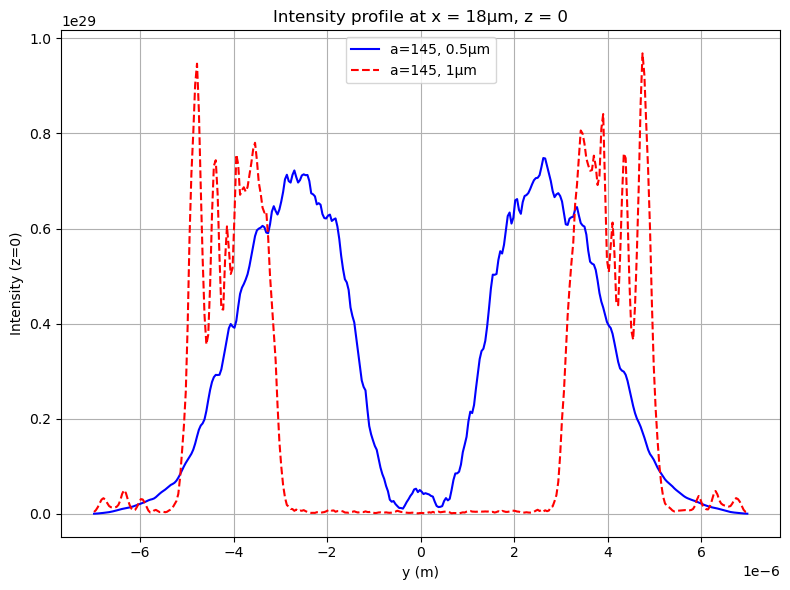

In [48]:
import sys, os
sys.path.append(os.path.abspath('..'))  # 相对于当前 Notebook 的目录
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *

# === 文件路径设置 ===
base_dir0 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米'
base_dir1 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-3微米'
file_name = 'field0008.sdf'
file_path0 = os.path.join(base_dir0, file_name)
file_path1 = os.path.join(base_dir1, file_name)

# === 加载字段数据 ===
result0 = load_field(file_path0)
result1 = load_field(file_path1)

# === 提取并计算光强（数据0）===
Ex0, Ey0, Ez0 = result0['Ex'], result0['Ey'], result0['Ez']
x0, y0, z0 = result0['x'], result0['y'], result0['z']
Intensity0 = Ex0**2 + Ey0**2 + Ez0**2
x_index0 = np.argmin(np.abs(x0 - 18e-6))
z_index0 = np.argmin(np.abs(z0 - 0.0))
I_y_z0_0 = Intensity0[x_index0, :, z_index0]

# === 提取并计算光强（数据1）===
Ex1, Ey1, Ez1 = result1['Ex'], result1['Ey'], result1['Ez']
x1, y1, z1 = result1['x'], result1['y'], result1['z']
Intensity1 = Ex1**2 + Ey1**2 + Ez1**2
x_index1 = np.argmin(np.abs(x1 - 18e-6))
z_index1 = np.argmin(np.abs(z1 - 0.0))
I_y_z0_1 = Intensity1[x_index1, :, z_index1]

# === 画折线图比较 ===
plt.figure(figsize=(8,6))
plt.plot(y0, I_y_z0_0, label='a=145, 0.5μm', color='blue')
plt.plot(y1, I_y_z0_1, label='a=145, 1μm', color='red', linestyle='--')
plt.xlabel('y (m)')
plt.ylabel('Intensity (z=0)')
plt.title('Intensity profile at x = 18μm, z = 0')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()